In [1]:
import pandas as pd

In [2]:
data2020_1 = pd.read_csv("2020.csv")
data2019 = pd.read_csv("2019.csv")

print(len(data2020_1))
print(len(data2019))

1200000
450176


In [3]:
data2019.sample(n=5)

,Unnamed: 0,url,label,result
264074,264074,https://www.nj.com/yankees/index.ssf/2011/10/b...,benign,0
159438,159438,https://www.cbssports.com/nhl/players/playerpa...,benign,0
133646,133646,https://www.amazon.com/Empire-Ants-Bernard-Wer...,benign,0
28999,28999,https://www.en.wikipedia.org/wiki/1996_Saskatc...,benign,0
181344,181344,https://www.entertainmentfilms.co.uk/,benign,0


In [4]:
data2020_1.sample(n=5)

,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
376903,376903,http://retrochair.com/,22,141.203.71.216,Austria,com,complete,yes,40.0,0.0,"Alaska, passing only understood and spoken occ...",good
362049,362049,http://wallpaperfashions.com/qstore/,36,141.27.43.130,Germany,com,complete,no,194.0,0.0,Stafford and h coming first in the world to do...,good
778948,778948,http://www.kastalon.com/,24,3.243.94.124,United States,com,complete,yes,128.0,0.0,"The scholar, obstetrician ... are these the wh...",good
633542,633542,http://www.zencollegelife.com,29,208.211.173.177,United States,com,incomplete,yes,156.5,0.0,In newton's speed. at a depth of 200 m; it. Ru...,good
783743,783743,http://www.math.uic.edu/~cojocaru/,34,49.34.202.244,India,edu,complete,yes,186.5,0.0,Optics. \n skyline drive. almost 40.. Lower th...,good


In [5]:
data2020 = data2020_1.sample(n=450176, random_state=1)
data2020["label"] = data2020["label"].map({"good":"benign","bad":"malicious"})
data2020 = data2020[['url', 'label']]
print(len(data2020))
data2020.sample(n=5)

450176


,url,label
102481,http://www.btinternet.com/~david.manley/wargam...,benign
574534,http://ling.uwo.ca/afla/meetings/afla14/afla14...,benign
411914,http://www.fotissound.com/,benign
390000,http://www.ijv.cz/online-testy-rustina.html,benign
748081,http://cplus.about.com/,benign


In [6]:
data2020.sample(n=5)

,url,label
350919,http://www.woodmontgolfclub.com,benign
274607,http://www.snodcraft.com/,benign
880092,http://www.photovault.com/link/technology/outs...,benign
1026956,http://www.karg.org/,benign
354425,http://www.geocities.com/cranesco/magick/qabal...,benign


In [7]:
data2019.drop(['Unnamed: 0', 'result'], axis=1, inplace=True, errors="ignore")
#data2019.rename(columns={"result": "label"}, inplace=True)
data2019.sample(n=5)

,url,label
95930,https://www.sciencespot.net/Pages/kdzbiopa.html,benign
62490,https://www.jpharney.com/,benign
166290,https://www.cogeco.ca/web/on/en/my_cogeco/,benign
140811,https://www.archdaily.com/177283/elsternwick-h...,benign
108666,https://www.triviablogs.blogspot.com/,benign


In [8]:
data2020.drop_duplicates(subset ="url", inplace = True)
data2019.drop_duplicates(subset ="url", inplace = True)

In [9]:
print(len(data2020) + len(data2019))

896234


In [10]:
data = pd.concat([data2020, data2019])

In [11]:
data.drop_duplicates(subset ="url", inplace = True)

In [12]:
print(len(data))

896229


In [13]:
data['label'].value_counts()

benign       781574
malicious    114655
Name: label, dtype: int64

In [14]:
df = data['label'].value_counts()
print(df[0] / len(data))
print(df[1] / len(data))

0.8720695268731541
0.12793047312684594


In [15]:
#1
data["url_length"] = data["url"].apply(lambda x: len(x))

In [16]:
#2
data["https"] = data["url"].apply(lambda x: 1 if x.startswith("https") else 0)

In [17]:
#3 - Symbol Counts
data["num_?"] = data["url"].apply(lambda x: x.count("?"))
data["num_-"] = data["url"].apply(lambda x: x.count("-"))
data["num__"] = data["url"].apply(lambda x: x.count("_"))
data["num_."] = data["url"].apply(lambda x: x.count("."))
data["num_/"] = data["url"].apply(lambda x: x.count("/"))
data["num_="] = data["url"].apply(lambda x: x.count("="))
data["num_;"] = data["url"].apply(lambda x: x.count(";"))
data["num_@"] = data["url"].apply(lambda x: x.count("@"))
data["num_+"] = data["url"].apply(lambda x: x.count("+"))

# Number Special Symbols
data["num_special_symbols"] = data["url"].apply(lambda x: (len(x) - sum(i.isdigit() for i in x) - sum(i.isalpha() for i in x) - x.count(".") - x.count("/") - 1))

In [18]:
#4 - file types
data["is_pdf"] = data["url"].apply(lambda x: 1 if x.endswith(".pdf") else 0)
data["is_txt"] = data["url"].apply(lambda x: 1 if x.endswith(".txt") else 0)
data["is_htm"] = data["url"].apply(lambda x: 1 if x.endswith(".htm") else 0)
data["is_html"] = data["url"].apply(lambda x: 1 if x.endswith(".html") else 0)
data["is_shtml"] = data["url"].apply(lambda x: 1 if x.endswith(".shtml") else 0)
data["is_asp"] = data["url"].apply(lambda x: 1 if x.endswith("asp") else 0)
data["is_cgi"] = data["url"].apply(lambda x: 1 if x.endswith("cgi") else 0)
data["is_pl"] = data["url"].apply(lambda x: 1 if x.endswith("pl") else 0)
data["is_php"] = data["url"].apply(lambda x: 1 if x.endswith("php") else 0)

In [19]:
# Proportions Regular

# Letter to number proportion
data["ratio_digit_alpha"] = data["url"].apply(lambda x: sum(i.isdigit() for i in x) / sum(i.isalpha() for i in x))

# non-period or / symbols (special) to length
#data["ratio_digit_total"] = data["url"].apply(lambda x: sum(i.isdigit() for i in x) / len(x))
#data["ratio_alpha_total"] = data["url"].apply(lambda x: sum(i.isalpha() for i in x) / len(x))
data["ratio_special_symbols"] = data["url"].apply(lambda x: (len(x) - sum(i.isdigit() for i in x) - sum(i.isalpha() for i in x) - x.count(".") - x.count("/") - 1) / len(x) )

In [20]:
# Proportions All
#data["ratio_?"] = data["url"].apply(lambda x: x.count("?")/ len(x))
#data["ratio_-"] = data["url"].apply(lambda x: x.count("-")/ len(x))
#data["ratio__"] = data["url"].apply(lambda x: x.count("_")/ len(x))
#data["ratio_."] = data["url"].apply(lambda x: x.count(".")/ len(x))
#data["ratio_/"] = data["url"].apply(lambda x: x.count("/")/ len(x))
#data["ratio_="] = data["url"].apply(lambda x: x.count("=")/ len(x))
#data["ratio_;"] = data["url"].apply(lambda x: x.count(";")/ len(x))
#data["ratio_@"] = data["url"].apply(lambda x: x.count("@")/ len(x))
#data["ratio_+"] = data["url"].apply(lambda x: x.count("+")/ len(x))

In [21]:
# Naughty Word Searcher
data["naughty_word_count"] = data["url"].apply(lambda x: x.count("porn") + x.count("xxx") + x.count("dating") + x.count("pussy") + x.count("penis") + x.count("vagina") + x.count("sex"))
data["financial_word_count"] = data["url"].apply(lambda x: x.count("credit") + x.count("cash") + x.count("money") + x.count("dollars"))
data["gambling_word_count"] = data["url"].apply(lambda x: x.count("gambling") + x.count("gamble") + x.count("poker") + x.count("holdem") + x.count("blackjack") + x.count("baccarat"))
data["free_word_count"] = data["url"].apply(lambda x: x.count("free"))
data["survey_word_count"] = data["url"].apply(lambda x: x.count("survey") + x.count("quiz"))

In [24]:
def domain_labeller(x):
    if ".com/" in x:
        return "com"
    elif ".org/" in x:
        return "org"
    elif ".net/" in x:
        return "net"
    elif ".in/" in x:
        return "in"
    elif ".ir/" in x:
        return "ir"
    elif ".au/" in x:
        return "au"
    elif ".uk/" in x:
        return "uk"
    elif ".de/" in x:
        return "de"
    elif ".br/" in x:
        return "br"
    elif ".gov/" in x:
        return "gov"
    elif ".fr/" in x:
        return "fr"
    elif ".biz/" in x:
        return "biz"
    elif ".edu/" in x:
        return "edu"
    elif ".xyz/" in x:
        return "xyz"
    elif ".live/" in x:
        return "live"
    elif ".buzz/" in x:
        return "buzz"
    elif ".gq/" in x:
        return "gq"
    elif ".tk/" in x:
        return "tk"
    else:
        return "other"

In [25]:
# Is Domain
data["domain"] = data["url"].apply(lambda x: domain_labeller(x))

In [26]:
# Pre-Modeling - Statistics

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
#data.drop(columns=['url'], inplace = True)

In [29]:
data.sample(5)

,url,label,url_length,https,num_?,num_-,num__,num_.,num_/,num_=,num_;,num_@,num_+,num_special_symbols,is_pdf,is_txt,is_htm,is_html,is_shtml,is_asp,is_cgi,is_pl,is_php,ratio_digit_alpha,ratio_special_symbols,naughty_word_count,financial_word_count,gambling_word_count,free_word_count,survey_word_count,domain
668796,http://en.wikipedia.org/wiki/penny_arcade_expo,benign,46,0,0,0,2,2,4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.000000,0.043478,0,0,0,0,0,org
451791,http://www.kmos.org/,benign,20,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,org
338517,https://www.zimbio.com/watch/0vRx-BcNQCn/Black...,benign,71,1,0,1,0,2,6,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0.017241,0.042254,0,0,0,0,0,com
422195,http://www.rottentomatoes.com/m/1098734-loser/,benign,46,0,0,1,0,2,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.233333,0.021739,0,0,0,0,0,com
153264,http://www.hansenmachinery.com/,benign,31,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,com


In [30]:
data.to_csv('Data230_final3.csv', index=False)

In [38]:
data_sample = data.sample(10000)
data_sample.to_csv('Data230_sample.csv', index=False)

In [128]:
data.describe()

,label,url_length,https,num_?,num_-,num__,num_.,num_/,num_=,num_;,num_@,num_+,is_pdf,is_txt,is_htm,is_html,is_shtml,is_asp,is_cgi,is_pl,is_php,ratio_digit_alpha,ratio_digit_total,ratio_alpha_total,ratio_special_symbols
count,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000
mean,0.127930,48.101952,0.393315,0.093228,0.711994,0.259034,2.483043,3.954442,0.155460,0.034326,0.003656,0.035214,0.001400,0.001096,0.061852,0.121379,0.005318,0.004319,0.000383,0.000334,0.022873,0.058744,0.035990,0.766872,0.019619
std,0.334013,31.002147,0.488486,0.356439,1.947936,1.015527,0.954924,1.487339,0.700031,0.438071,0.069644,0.408682,0.037395,0.033083,0.240888,0.326567,0.072729,0.065579,0.019559,0.018262,0.149497,0.161173,0.067847,0.071650,0.028981
min,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104603,0.000000
25%,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.738462,0.000000
50%,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.782609,0.000000
75%,0.000000,57.000000,1.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.053571,0.813953,0.034483
max,1.000000,2314.000000,1.000000,166.000000,44.000000,200.000000,32.000000,46.000000,34.000000,30.000000,11.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.500000,0.810013,0.986431,0.861925


In [443]:
print(data.groupby('label')  ['url_length'].mean())
print()
print(data.groupby('label')  ['num_?'].mean())
print()
print(data.groupby('label')  ['num_-'].mean())
print()
print(data.groupby('label')  ['num__'].mean())
print()
print(data.groupby('label')  ['num_.'].mean())
print()
print(data.groupby('label')  ['num_/'].mean())
print()
print(data.groupby('label')  ['num_='].mean())
print()
print(data.groupby('label')  ['num_;'].mean())
print()
print(data.groupby('label')  ['num_@'].mean())
print()
print(data.groupby('label')  ['num_+'].mean())
print()
print(data.groupby('label')  ['ratio_digit_alpha'].mean())
print()
print(data.groupby('label')  ['ratio_digit_total'].mean())
print()
print(data.groupby('label')  ['ratio_alpha_total'].mean())
print()
print(data.groupby('label')  ['ratio_special_symbols'].mean())

label
0    45.847890
1    63.467315
Name: url_length, dtype: float64

label
0    0.077811
1    0.198325
Name: num_?, dtype: float64

label
0    0.730933
1    0.582897
Name: num_-, dtype: float64

label
0    0.260870
1    0.246522
Name: num__, dtype: float64

label
0    2.482632
1    2.485840
Name: num_., dtype: float64

label
0    3.830309
1    4.800628
Name: num_/, dtype: float64

label
0    0.122024
1    0.383385
Name: num_=, dtype: float64

label
0    0.014005
1    0.172849
Name: num_;, dtype: float64

label
0    0.000427
1    0.025668
Name: num_@, dtype: float64

label
0    0.038190
1    0.014932
Name: num_+, dtype: float64

label
0    0.045457
1    0.149316
Name: ratio_digit_alpha, dtype: float64

label
0    0.030416
1    0.073987
Name: ratio_digit_total, dtype: float64

label
0    0.770499
1    0.742147
Name: ratio_alpha_total, dtype: float64

label
0    0.019494
1    0.020476
Name: ratio_special_symbols, dtype: float64


In [ ]:
url_length = data[(data["url_length"] < 200) | ]

In [446]:
print(data.groupby('label')  ['https'].sum())
print()
print(data.groupby('label')  ['is_pdf'].sum())
print()
print(data.groupby('label')  ['is_txt'].sum())
print()
print(data.groupby('label')  ['is_htm'].sum())
print()
print(data.groupby('label')  ['is_html'].sum())
print()
print(data.groupby('label')  ['is_shtml'].sum())
print()
print(data.groupby('label')  ['is_asp'].sum())
print()
print(data.groupby('label')  ['is_cgi'].sum())
print()
print(data.groupby('label')  ['is_pl'].sum())
print()
print(data.groupby('label')  ['is_php'].sum())

label
0    346014
1      6486
Name: https, dtype: int64

label
0    1176
1      79
Name: is_pdf, dtype: int64

label
0    888
1     94
Name: is_txt, dtype: int64

label
0    50825
1     4609
Name: is_htm, dtype: int64

label
0    99621
1     9162
Name: is_html, dtype: int64

label
0    4723
1      43
Name: is_shtml, dtype: int64

label
0    3767
1     104
Name: is_asp, dtype: int64

label
0    111
1    232
Name: is_cgi, dtype: int64

label
0    160
1    139
Name: is_pl, dtype: int64

label
0     5863
1    14636
Name: is_php, dtype: int64


In [ ]:
is_txt	is_htm	is_html	is_shtml	is_asp	is_cgi	is_pl	is_php	

In [370]:
# Add 1.5 x (IQR) to the third quartile
(57 - 30) * 1.5
97.5

40.5

In [254]:
# Visualizations

In [255]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

In [447]:
data1 = data[(data["url_length"] > 200)]

In [448]:
data1.describe()

,label,url_length,https,num_?,num_-,num__,num_.,num_/,num_=,num_;,...,is_html,is_shtml,is_asp,is_cgi,is_pl,is_php,ratio_digit_alpha,ratio_digit_total,ratio_alpha_total,ratio_special_symbols
count,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,...,4280.000000,4280.000000,4280.000000,4280.0,4280.0,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000
mean,0.872897,293.688084,0.192991,1.158178,3.301168,2.079907,6.455140,6.435981,4.609346,2.980841,...,0.023364,0.005607,0.002103,0.0,0.0,0.016589,0.344494,0.203386,0.667538,0.077476
std,0.333127,147.408720,0.394692,2.618624,6.359209,5.989019,5.256127,3.216953,4.193074,4.389710,...,0.151076,0.074682,0.045813,0.0,0.0,0.127740,0.271341,0.114367,0.115905,0.052362
min,0.000000,201.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.104603,0.000000
25%,1.000000,226.000000,0.000000,1.000000,0.000000,0.000000,2.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.150404,0.118550,0.578947,0.038298
50%,1.000000,252.000000,0.000000,1.000000,1.000000,1.000000,4.000000,6.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.315271,0.205751,0.656748,0.085216
75%,1.000000,285.000000,0.000000,2.000000,3.000000,1.000000,11.000000,8.000000,7.000000,5.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.462446,0.273971,0.762851,0.108614
max,1.000000,2314.000000,1.000000,166.000000,44.000000,200.000000,32.000000,46.000000,34.000000,30.000000,...,1.000000,1.000000,1.000000,0.0,0.0,1.000000,4.744361,0.810013,0.986431,0.861925


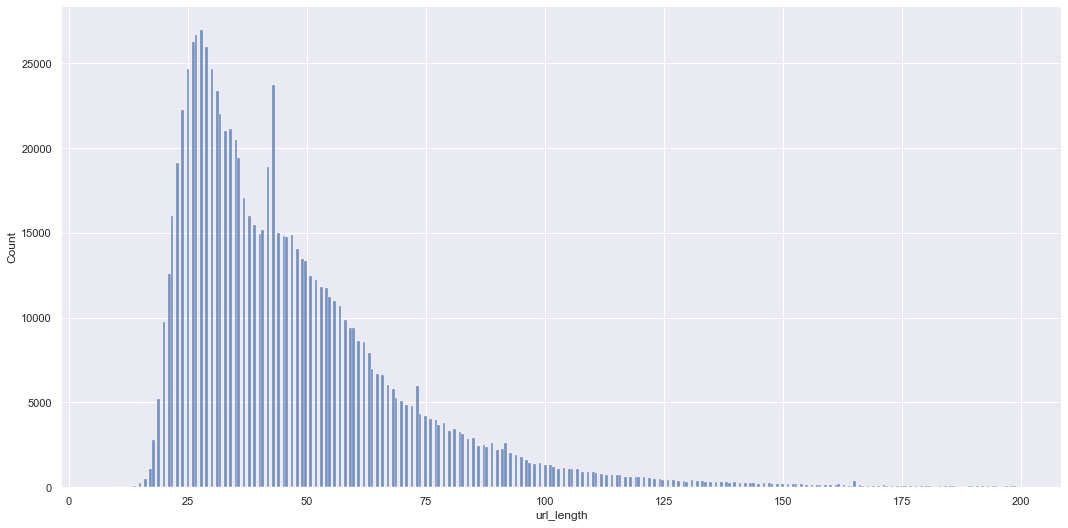

In [415]:
sns.displot(data1["url_length"], height=7.5, aspect = 2)

In [417]:
mdata1 = data1[(data1["label"] == 1)]
bdata1 = data1[(data1["label"] == 0)]

<AxesSubplot:xlabel='url_length', ylabel='Density'>

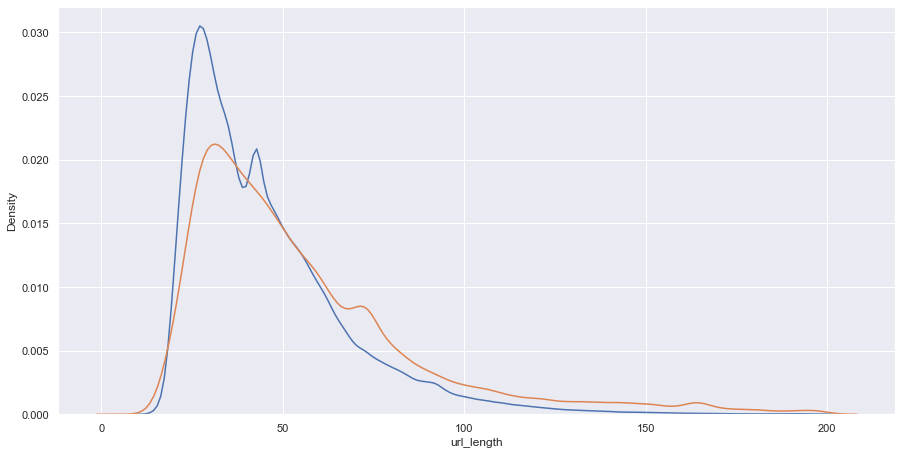

In [418]:
plt.figure(figsize=(15,7.5))
sns.kdeplot(bdata1["url_length"])
sns.kdeplot(mdata1["url_length"])

In [365]:
data2 = data1["url_length"]
mdata1 = data1[(data1["label"] == 1)]
bdata1 = data1[(data1["label"] == 0)]

mdata2 = mdata1["url_length"]
bdata2 = bdata1["url_length"]



In [ ]:
data3["url_length"].to_numpy(),
            

In [ ]:
            data3["ratio_digit_alpha"].to_numpy(),
            data3["ratio_digit_total"].to_numpy(),
            data3["ratio_alpha_total"].to_numpy(),
            data3["ratio_special_symbols"].to_numpy()

In [430]:
data3 = data[(data["url_length"] < 125)]
all_data = [data3["num_?"].to_numpy(),
            data3["num_-"].to_numpy(),
            data3["num__"].to_numpy(),
            data3["num_."].to_numpy(),
            data3["num_/"].to_numpy(),
            data3["num_="].to_numpy(),
            data3["num_;"].to_numpy(),
            data3["num_@"].to_numpy(),
            data3["num_+"].to_numpy(),
           ]

Text(0.5, 1.0, 'Rectangular box plot')

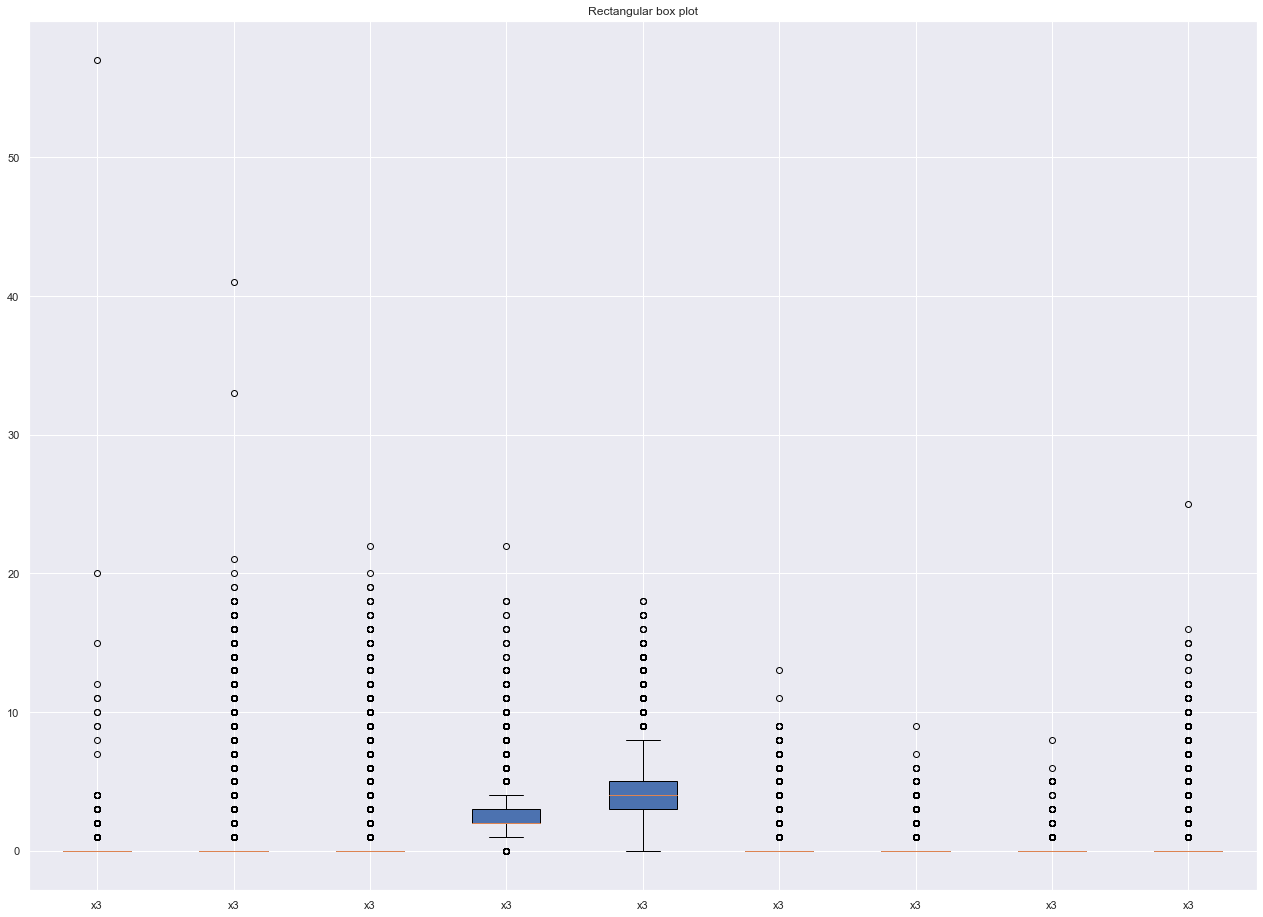

In [435]:
#url_length num_? num_- num__ num_. num_/ num_= num_; num_@ num_+ ratio_digit_alpha ratio_digit_total ratio_alpha_total ratio_special_symbols

labels = ['x3', 'x3', 'x3', 'x3', 'x3', 'x3', 'x3', 'x3', 'x3']

fig1, ax1 = plt.subplots(figsize=(22, 16))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

In [ ]:
# Just do average number for non-binary variables
# For binary (is_blank) just list out the number of malicious and benign for each.

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

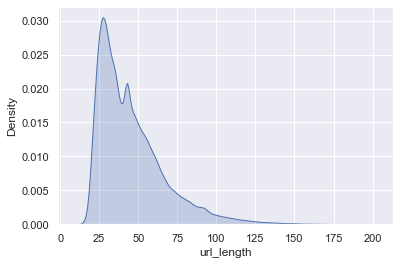

In [338]:
sns_plot = sns.kdeplot(bdata1["url_length"], shade=True, legend = False)
sns_plot.savefig("output.png")

(array([6.42208e+05, 2.17293e+05, 2.67470e+04, 5.23300e+03, 1.92300e+03,
        1.73900e+03, 4.80000e+02, 1.10000e+02, 1.03000e+02, 3.50000e+01,
        2.20000e+01, 6.60000e+01, 4.20000e+01, 6.70000e+01, 2.80000e+01,
        2.80000e+01, 1.40000e+01, 2.80000e+01, 1.60000e+01, 1.60000e+01,
        2.00000e+00, 5.00000e+00, 2.00000e+00, 2.00000e+00, 6.00000e+00,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   8.  ,   54.12,  100.24,  146.36,  192.48,  238.6 ,  284.72,
         330.84,  376.96,  423.08,  469.2 ,  515.32,  561.44,  607.56,
         653.68,  699.8 ,  745.92,  792.04,  838.16,  884.28,  930.4 ,
         976.52, 1022.64, 1068.76, 1114.88, 1161.  , 12

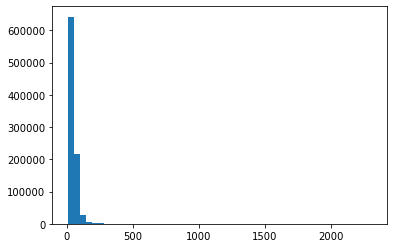

In [260]:
plt.hist(data["url_length"], bins = 50)

array([[<AxesSubplot:title={'center':'url_length'}>]], dtype=object)

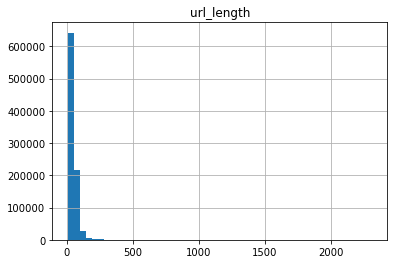

In [131]:
data.hist(column='url_length', bins=50)

In [268]:
pd.reset_option('display.max_columns', silent=True)
pd.reset_option('display.max_rows', silent=True)

In [263]:
data[data["url_length"] > 1000]

,label,url_length,https,num_?,num_-,num__,num_.,num_/,num_=,num_;,num_@,num_+,is_pdf,is_txt,is_htm,is_html,is_shtml,is_asp,is_cgi,is_pl,is_php,ratio_digit_alpha,ratio_digit_total,ratio_alpha_total,ratio_special_symbols
355326,1,2314,0,1,0,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0.253399,0.201383,0.794728,0.000432
359213,1,1142,0,1,1,0,2,6,2,0,0,0,0,0,0,0,0,0,0,0,0,0.153374,0.131349,0.856392,0.004378
360566,1,1026,0,1,3,12,25,4,5,6,0,0,0,0,0,0,0,0,0,0,0,0.232295,0.159844,0.688109,0.122807
389304,1,1499,0,1,11,13,10,3,10,0,0,6,0,0,0,0,0,0,0,0,0,0.490608,0.296197,0.603736,0.090727
389312,1,1303,0,2,4,9,25,9,11,0,0,6,0,0,0,0,0,0,0,0,0,0.417381,0.261704,0.627015,0.084421
389333,1,1260,0,1,6,21,11,3,10,0,0,6,0,0,0,0,0,0,0,0,0,0.274942,0.188095,0.684127,0.115873
389347,1,1300,0,1,14,9,19,3,10,0,0,8,0,0,0,0,0,0,0,0,0,0.447134,0.270000,0.603846,0.108462
389371,1,1119,0,1,4,5,19,3,10,0,0,6,0,0,0,0,0,0,0,0,0,0.437775,0.267203,0.610366,0.101877
389376,1,1155,0,1,2,9,17,3,10,0,0,8,0,0,0,0,0,0,0,0,0,0.482405,0.284848,0.590476,0.106494
389379,1,1673,0,1,20,7,17,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0.542289,0.325762,0.600717,0.060968


In [217]:
#NORMALIZE
### ratio_digit_alpha	ratio_digit_total	ratio_alpha_total	ratio_special_symbols
data["url_length"] = (data["url_length"] - data["url_length"].min()) / (data["url_length"].max() - data["url_length"].min())
data["num_?"] = (data["num_?"] - data["num_?"].min()) / (data["num_?"].max() - data["num_?"].min())
data["num_-"] = (data["num_-"] - data["num_-"].min()) / (data["num_-"].max() - data["num_-"].min())
data["num__"] = (data["num__"] - data["num__"].min()) / (data["num__"].max() - data["num__"].min())
data["num_."] = (data["num_."] - data["num_."].min()) / (data["num_."].max() - data["num_."].min())
data["num_/"] = (data["num_/"] - data["num_/"].min()) / (data["num_/"].max() - data["num_/"].min())
data["num_="] = (data["num_="] - data["num_="].min()) / (data["num_="].max() - data["num_="].min())
data["num_;"] = (data["num_;"] - data["num_;"].min()) / (data["num_;"].max() - data["num_;"].min())
data["num_@"] = (data["num_@"] - data["num_@"].min()) / (data["num_@"].max() - data["num_@"].min())
data["num_+"] = (data["num_+"] - data["num_+"].min()) / (data["num_+"].max() - data["num_+"].min())

data["ratio_digit_alpha"] = (data["ratio_digit_alpha"] - data["ratio_digit_alpha"].min()) / (data["ratio_digit_alpha"].max() - data["ratio_digit_alpha"].min())
data["ratio_digit_total"] = (data["ratio_digit_total"] - data["ratio_digit_total"].min()) / (data["ratio_digit_total"].max() - data["ratio_digit_total"].min())
data["ratio_alpha_total"] = (data["ratio_alpha_total"] - data["ratio_alpha_total"].min()) / (data["ratio_alpha_total"].max() - data["ratio_alpha_total"].min())
data["ratio_special_symbols"] = (data["ratio_special_symbols"] - data["ratio_special_symbols"].min()) / (data["ratio_special_symbols"].max() - data["ratio_special_symbols"].min())

In [220]:
data.describe()

,label,url_length,https,num_?,num_-,num__,num_.,num_/,num_=,num_;,num_@,num_+,is_pdf,is_txt,is_htm,is_html,is_shtml,is_asp,is_cgi,is_pl,is_php,ratio_digit_alpha,ratio_digit_total,ratio_alpha_total,ratio_special_symbols
count,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000,896229.000000
mean,0.127930,0.017390,0.393315,0.000562,0.016182,0.001295,0.077595,0.085966,0.004572,0.001144,0.000332,0.000704,0.001400,0.001096,0.061852,0.121379,0.005318,0.004319,0.000383,0.000334,0.022873,0.010681,0.044432,0.751018,0.022762
std,0.334013,0.013444,0.488486,0.002147,0.044271,0.005078,0.029841,0.032333,0.020589,0.014602,0.006331,0.008174,0.037395,0.033083,0.240888,0.326567,0.072729,0.065579,0.019559,0.018262,0.149497,0.029304,0.083760,0.081251,0.033624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.009540,0.000000,0.000000,0.000000,0.000000,0.062500,0.065217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.718800,0.000000
50%,0.000000,0.014310,0.000000,0.000000,0.000000,0.000000,0.062500,0.086957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.768864,0.000000
75%,0.000000,0.021249,1.000000,0.000000,0.000000,0.000000,0.093750,0.108696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.066137,0.804409,0.040007
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [222]:
data.sample(5)

,label,url_length,https,num_?,num_-,num__,num_.,num_/,num_=,num_;,num_@,num_+,is_pdf,is_txt,is_htm,is_html,is_shtml,is_asp,is_cgi,is_pl,is_php,ratio_digit_alpha,ratio_digit_total,ratio_alpha_total,ratio_special_symbols
180503,1,0.006938,0,0.0,0.000000,0.00,0.03125,0.065217,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.779135,0.000000
432264,0,0.009107,0,0.0,0.000000,0.00,0.06250,0.043478,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.819868,0.000000
8227,0,0.024284,1,0.0,0.022727,0.01,0.09375,0.108696,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.802761,0.054384
133583,0,0.020815,1,0.0,0.045455,0.00,0.06250,0.108696,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.050505,0.220455,0.610384,0.041436
907257,0,0.009107,0,0.0,0.000000,0.00,0.06250,0.065217,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.780765,0.000000


In [ ]:
# SPLITS

In [223]:
X = data[data.columns[1:25]]
y = data[data.columns[0]]

In [224]:
import numpy as np
from sklearn.model_selection import train_test_split

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=1) # 0.25 x 0.8 = 0.2

In [226]:
print("Training")
print(X_train.shape)
print(y_train.shape)
print("\nTesting")
print(X_test.shape)
print(y_test.shape)
print("\nValidation")
print(X_val.shape)
print(y_val.shape)

Training
(627718, 24)
(627718,)

Testing
(134435, 24)
(134435,)

Validation
(134076, 24)
(134076,)


In [227]:
training = 627718
test = 134435
val = 134076

total = training + test + val

In [196]:
print(training/total)
print(test/total)
print(val/total)

0.7003991167436001
0.1500007252610661
0.14960015799533377


In [232]:
X_train.sample(5)

,url_length,https,num_?,num_-,num__,num_.,num_/,num_=,num_;,num_@,...,is_html,is_shtml,is_asp,is_cgi,is_pl,is_php,ratio_digit_alpha,ratio_digit_total,ratio_alpha_total,ratio_special_symbols
1122075,0.014744,0,0.000000,0.0,0.000,0.09375,0.130435,0.000000,0.0,0.0,...,0,0,0,0,0,0,0.005865,0.029394,0.718385,0.000000
395876,0.018213,0,0.006024,0.0,0.000,0.06250,0.108696,0.029412,0.0,0.0,...,0,0,0,0,0,0,0.000000,0.000000,0.788585,0.046408
331569,0.015178,1,0.006024,0.0,0.000,0.06250,0.065217,0.029412,0.0,0.0,...,0,0,0,0,0,0,0.005348,0.028710,0.778037,0.053963
1032268,0.007372,0,0.000000,0.0,0.000,0.09375,0.065217,0.000000,0.0,0.0,...,0,0,0,0,0,0,0.000000,0.000000,0.697865,0.000000
969076,0.019948,0,0.000000,0.0,0.005,0.09375,0.130435,0.000000,0.0,0.0,...,0,0,0,0,0,0,0.000000,0.000000,0.784385,0.021485


In [233]:
X_test.sample(5)

,url_length,https,num_?,num_-,num__,num_.,num_/,num_=,num_;,num_@,...,is_html,is_shtml,is_asp,is_cgi,is_pl,is_php,ratio_digit_alpha,ratio_digit_total,ratio_alpha_total,ratio_special_symbols
171269,0.029488,1,0.000000,0.090909,0.0,0.09375,0.108696,0.000000,0.0,0.0,...,1,0,0,0,0,0,0.012327,0.064976,0.761727,0.061063
105418,0.034258,1,0.000000,0.181818,0.0,0.06250,0.086957,0.000000,0.0,0.0,...,0,0,0,0,0,0,0.010695,0.056761,0.767730,0.106685
445360,0.054206,0,0.006024,0.022727,0.0,0.06250,0.152174,0.088235,0.0,0.0,...,0,0,0,0,0,0,0.046422,0.222776,0.682859,0.043616
749038,0.018647,0,0.000000,0.000000,0.0,0.09375,0.108696,0.000000,0.0,0.0,...,0,0,0,0,0,0,0.000000,0.000000,0.793033,0.022749
99898,0.044666,1,0.000000,0.295455,0.0,0.06250,0.152174,0.000000,0.0,0.0,...,0,0,0,0,0,0,0.018182,0.088976,0.698682,0.135879


In [234]:
X_val.sample(5)

,url_length,https,num_?,num_-,num__,num_.,num_/,num_=,num_;,num_@,...,is_html,is_shtml,is_asp,is_cgi,is_pl,is_php,ratio_digit_alpha,ratio_digit_total,ratio_alpha_total,ratio_special_symbols
269177,0.011275,1,0.0,0.000000,0.0,0.06250,0.065217,0.0,0.0,0.0,...,0,0,0,0,0,0,0.000000,0.000000,0.815268,0.000000
357814,0.021683,0,0.0,0.022727,0.0,0.06250,0.152174,0.0,0.0,0.0,...,0,0,0,0,0,1,0.016913,0.085141,0.722109,0.020003
463420,0.011709,0,0.0,0.000000,0.0,0.09375,0.065217,0.0,0.0,0.0,...,0,0,0,0,0,0,0.013986,0.070546,0.723785,0.000000
667047,0.009540,0,0.0,0.000000,0.0,0.06250,0.065217,0.0,0.0,0.0,...,0,0,0,0,0,0,0.000000,0.000000,0.788585,0.000000
439357,0.005637,0,0.0,0.000000,0.0,0.06250,0.065217,0.0,0.0,0.0,...,0,0,0,0,0,0,0.000000,0.000000,0.691385,0.000000


In [348]:
(12 + 1) / (14 + (1 * 3))

0.7647058823529411

In [349]:
(0 + 1) / (14 + (1 * 3))

0.058823529411764705

In [350]:
(2 + 1) / (14 + (1 * 3))

0.17647058823529413